In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)

In [2]:
# read in combine + careers dataset
cc = pd.read_csv('cc.csv')
cc.head()

,Player,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48
0,Blake Griffin,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28,19,2009,LAC,20.106,F,us,Oklahoma,2011.0,2019.0,604.0,35.0,21.9,9.0,4.5,0.9,0.5,0.502,0.522,0.342,0.692,75.3,0.171
1,Terrence Williams,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18,464,2009,NJN,22.003,F,us,Louisville,2010.0,2013.0,153.0,19.1,7.1,3.6,2.4,0.5,0.1,0.412,0.432,0.317,0.659,-0.2,-0.004
2,Gerald Henderson,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14,258,2009,CHA,21.204,G,us,Duke,2010.0,2017.0,535.0,25.9,11.2,3.2,1.9,0.7,0.3,0.440,0.460,0.327,0.793,18.3,0.063
3,Tyler Hansbrough,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27,58,2009,IND,23.240,F,us,UNC,2010.0,2016.0,428.0,16.9,6.7,4.2,0.4,0.5,0.2,0.439,0.442,0.136,0.738,20.2,0.134
4,Earl Clark,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35,329,2009,PHO,21.165,F,us,Louisville,2010.0,2015.0,261.0,13.9,4.4,3.0,0.5,0.3,0.5,0.403,0.424,0.328,0.664,2.9,0.038


#### A. Individual Variables: Physical Measurements

Most of the physical measurements appear to be bell-shaped and roughly normally distributed, as we might expect. `Body Fat` is an obvious exception, and the hand measurements have some notable outliers. The height variables are somewhat bimodal, with all other variables being mostly unimodal. We'll take a look at each of the unusual features.

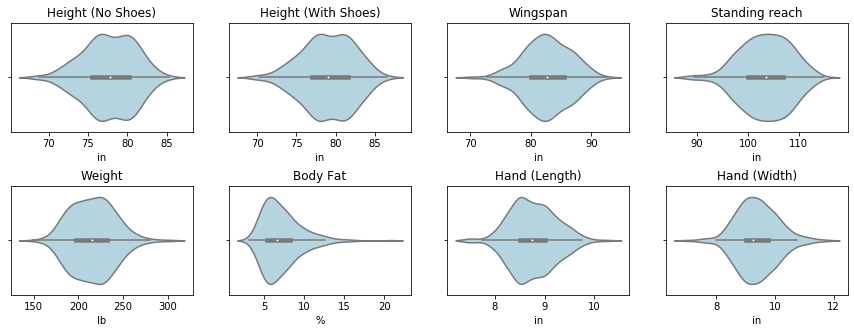

In [158]:
import warnings
warnings.filterwarnings("ignore")

physicals = ['Height (No Shoes)', 'Height (With Shoes)', 'Wingspan', 'Standing reach', 
             'Weight', 'Body Fat', 'Hand (Length)', 'Hand (Width)']

fig = plt.figure(figsize = (15, 5))   
for i in range(1, 9):
    plt.subplot(2, 4, i)
    # plt.hist(physicals[i - 1], data = cc[cc[physicals[i - 1]].notnull()], histtype = 'bar', ec = 'black')
    sns.violinplot(x = physicals[i - 1], data = cc[cc[physicals[i - 1]].notnull()], color = 'lightblue')
    # sns.swarmplot(x = physicals[i - 1], data = cc[cc[physicals[i - 1]].notnull()], alpha = 0.2)
    plt.subplots_adjust(hspace = 0.5)
    plt.title(physicals[i - 1])
    if physicals[i - 1] == 'Weight':
        plt.xlabel('lb')
    elif physicals[i - 1] == 'Body Fat':
        plt.xlabel('%')
    else:
        plt.xlabel('in')
     
plt.show()

First, let's take a closer look at `Body Fat`, specifically the players that have a body fat percentage greater than 13, the upper end of what is expected of most athletes. Unsurprisingly, the players with the highest body fat tend to be picked lower, since teams may view them as "overweight" or "unathletic"; indeed, most of these players were fairly low picks and did not end up playing much in the NBA. The notable exception is DeMarcus Cousins, an All-Star center who dominated possibly because he knew how to use his weight and bulk.

In [91]:
cc[cc['Body Fat'] > 13][['Player', 'Pk', 'Pos', 'Weight', 'Body Fat', 'G', 'MPG']].sort_values('Body Fat')

,Player,Pk,Pos,Weight,Body Fat,G,MPG
100,Jeremy Tyler,39.0,C,262.0,13.4,104.0,9.9
213,Kyle Anderson,30.0,G-F,230.0,13.4,305.0,19.6
323,Tyler Lydon,24.0,F,215.0,13.6,26.0,3.7
55,Daniel Orton,29.0,C-F,269.0,13.8,51.0,10.6
191,Ryan Kelly,48.0,F,228.0,14.8,163.0,19.2
269,Dakari Johnson,48.0,C,265.0,14.9,31.0,5.2
98,Trey Thompkins,37.0,F,239.0,15.5,24.0,5.0
68,DeMarcus Cousins,5.0,C-F,292.0,16.4,565.0,32.0
58,Dexter Pittman,32.0,C,303.0,20.8,50.0,6.9


Second, let's look at `Hand (Length)` and `Hand (Width)`.

In [153]:
cc[cc['Hand (Length)'] > 9.5]

,Player,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48
45,Larry Sanders,15.0,81.25,82.50,89.75,112.0,28.0,140.0,25.5,137.5,222.0,4.6,9.75,11.00,7.0,12.49,3.27,117,2010,MIL,21.220,C-F,us,Virginia Commonwealth,2011.0,2017.0,238.0,19.5,6.4,5.7,0.7,0.6,1.8,0.480,0.481,0.000,0.553,10.3,0.107
58,Dexter Pittman,32.0,81.50,83.50,90.00,111.0,NaN,NaN,NaN,NaN,303.0,20.8,10.25,10.50,NaN,NaN,NaN,244,2010,MIA,22.119,C,us,Texas,2011.0,2014.0,50.0,6.9,2.3,1.8,0.2,0.2,0.2,0.450,0.450,NaN,0.545,0.5,0.068
81,Kawhi Leonard,15.0,78.00,79.00,87.00,106.0,32.0,138.0,25.5,131.5,227.0,5.4,9.75,11.25,3.0,11.45,3.15,3,2011,IND,19.364,F,us,San Diego State,2012.0,2020.0,473.0,30.8,17.8,6.3,2.4,1.8,0.7,0.494,0.537,0.383,0.848,66.9,0.220
124,Andrew Nicholson,19.0,80.50,81.50,88.00,107.0,30.5,137.5,28.5,135.5,234.0,7.6,10.00,10.75,10.0,11.89,3.67,309,2012,ORL,22.208,F,ca,St. Bonaventure,2013.0,2017.0,285.0,14.3,6.0,3.0,0.4,0.3,0.3,0.467,0.498,0.321,0.773,3.8,0.045
153,Thomas Robinson,5.0,79.75,80.75,87.25,106.0,35.5,141.5,28.5,134.5,244.0,5.0,9.75,10.50,15.0,11.96,3.17,289,2012,SAC,21.109,F,us,Kansas,2013.0,2017.0,313.0,13.4,4.9,4.8,0.6,0.5,0.4,0.470,0.472,0.000,0.505,4.6,0.053
169,Mason Plumlee,22.0,83.25,84.50,83.00,108.0,36.0,144.0,30.5,138.5,238.0,6.2,9.75,9.50,14.0,10.89,3.29,47,2013,BRK,23.120,C-F,us,Duke,2014.0,2020.0,477.0,22.0,8.4,6.3,2.2,0.8,1.0,0.570,0.576,0.071,0.566,31.4,0.144
173,Rudy Gobert,27.0,84.50,86.00,92.50,115.0,29.0,144.0,25.0,140.0,238.0,4.4,9.75,10.00,7.0,12.85,3.57,4,2013,DEN,21.006,C,fr,NaN,2014.0,2020.0,413.0,28.8,11.1,10.6,1.3,0.7,2.2,0.628,0.629,0.000,0.631,53.6,0.216
217,Jarnell Stokes,35.0,79.00,80.50,85.25,103.5,36.0,139.5,31.0,134.5,263.0,8.2,9.75,10.50,NaN,11.92,3.26,9,2014,UTA,20.175,C-F,us,Tennessee,2015.0,2017.0,28.0,5.4,2.4,1.4,0.3,0.3,0.2,0.581,0.581,NaN,0.531,0.6,0.202
239,Noah Vonleh,9.0,80.00,81.50,88.25,108.0,37.0,145.0,31.0,139.0,247.0,7.3,9.75,11.75,NaN,11.45,3.28,221,2014,CHH,18.311,F,us,Indiana,2015.0,2020.0,304.0,17.6,5.1,5.4,0.8,0.4,0.4,0.456,0.496,0.312,0.686,8.6,0.077


In [114]:
cc.iloc[np.abs(stats.zscore(cc['Hand (Width)'].dropna())) > 3, :]

,Player,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48
14,Byron Mullens,24.0,83.75,85.25,85.50,111.0,32.5,143.5,28.5,139.5,258.0,8.5,NaN,NaN,10.0,11.10,3.45,390,2009,DAL,20.136,C,us,Ohio State,2010.0,2014.0,189.0,18.2,7.4,4.2,0.8,0.4,0.5,0.408,0.438,0.319,0.706,0.6,0.008
85,Derrick Williams,2.0,79.25,80.75,85.50,108.0,34.5,142.5,29.0,137.0,248.0,10.8,9.00,9.75,19.0,11.03,3.23,224,2011,MIN,20.034,F,us,Arizona,2012.0,2018.0,428.0,20.7,8.9,4.0,0.7,0.5,0.3,0.434,0.484,0.300,0.710,14.1,0.076
203,T.J. Warren,14.0,79.00,80.25,82.25,104.0,35.5,139.5,27.0,131.0,220.0,8.0,8.75,9.00,NaN,11.10,3.26,184,2014,PHO,20.299,F,us,NC State,2015.0,2020.0,267.0,27.9,14.4,4.1,1.1,1.0,0.5,0.496,0.524,0.333,0.765,13.1,0.085


#### B. Individual Variables: Athletic Measurements

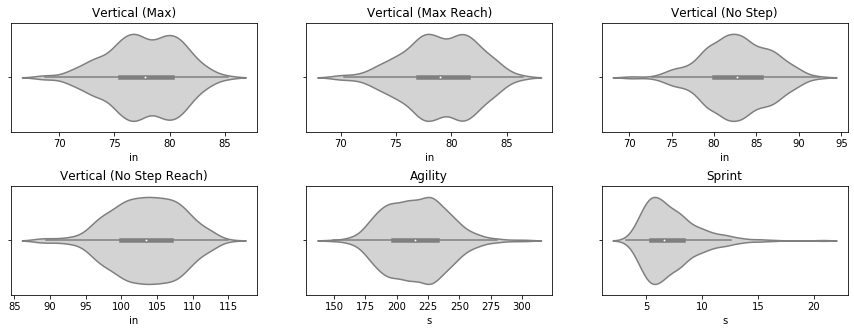

In [90]:
athletics = ['Vertical (Max)', 'Vertical (Max Reach)', 'Vertical (No Step)', 
             'Vertical (No Step Reach)','Agility', 'Sprint']

fig = plt.figure(figsize = (15, 5))   
for i in range(1, 7):
    plt.subplot(2, 3, i)
    # plt.hist(athletics[i - 1], data = cc[cc[athletics[i - 1]].notnull()], histtype = 'bar', ec = 'black')
    sns.violinplot(x = physicals[i - 1], data = cc[cc[physicals[i - 1]].notnull()], color = 'lightgray', bw = 0.25)
    plt.subplots_adjust(hspace = 0.5)
    plt.title(athletics[i - 1])
    if athletics[i - 1] in ['Agility', 'Sprint']:
        plt.xlabel('s')
    else:
        plt.xlabel('in')
     
plt.show()

#### C. Individual Variables: Box Score Statistics